In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("hares.csv")
df['Day']= df['Day'].astype(str)
df['Treatment'] = df['Treatment'].apply(lambda x: "D" if x=="Dune" else ("SM" if x=="Salt Marsh" else "AG"))
df.head()

,Treatment,Replicate,Measurement,Hare,Rabbit,Plantspecies,Who,Day
0,D,1,1,2,3,6,Julia/Sharmi,1
1,D,1,2,0,0,5,Julia/Sharmi,1
2,D,1,3,6,2,7,Julia/Sharmi,1
3,D,1,4,0,0,5,Nguyen,1
4,D,1,5,3,2,5,Nguyen,1


In [3]:
longer = pd.read_csv("hares_longer.csv")
longer['Day'] = longer['Day'].astype(str)
longer['Treatment'] = longer['Treatment'].apply(lambda x: "D" if x=="Dune" else ("SM" if x=="Salt Marsh" else "AG"))
longer.head()

,Treatment,Replicate,Measurement,Droppings,Herbivore,Plantspecies,Who,Day
0,D,1,1,2,Hare,6,Julia/Sharmi,1
1,D,1,2,0,Hare,5,Julia/Sharmi,1
2,D,1,3,6,Hare,7,Julia/Sharmi,1
3,D,1,4,0,Hare,5,Nguyen,1
4,D,1,5,3,Hare,5,Nguyen,1


In [4]:
od = ['AG', 'D', 'SM']

# Day 1 vs. Day2

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.rc('font', family='sans-serif') 
plt.rc('font', serif='Helvetica Neue') 
plt.rc('text', usetex='false') 
plt.rcParams.update({'font.size': 25})

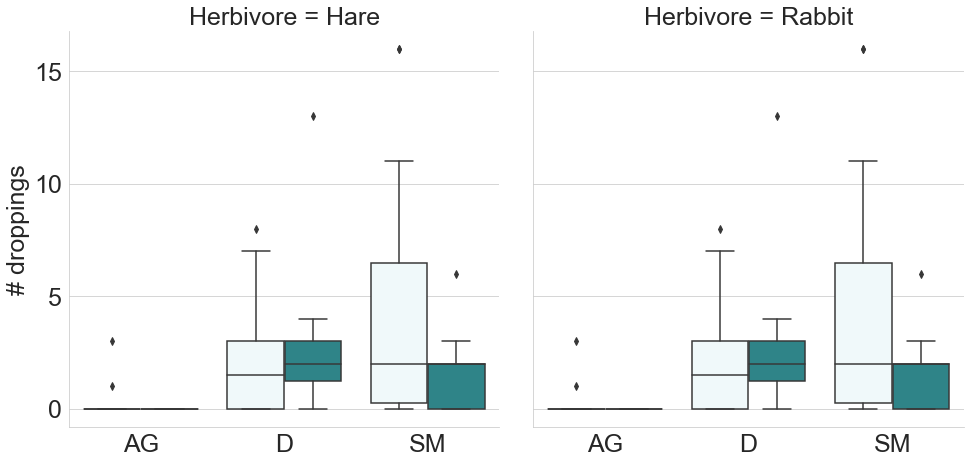

In [7]:
g = sns.FacetGrid(longer, col="Herbivore", height=7)
g.map(sns.boxplot, x="Treatment", y="Droppings", data=longer, order=od, 
      hue="Day", palette=['#EEFBFC', '#209297'])
g.set_axis_labels("", "# droppings")

plt.savefig("fig/day1-2_dropping.svg", bbox_inches='tight')

plt.show()

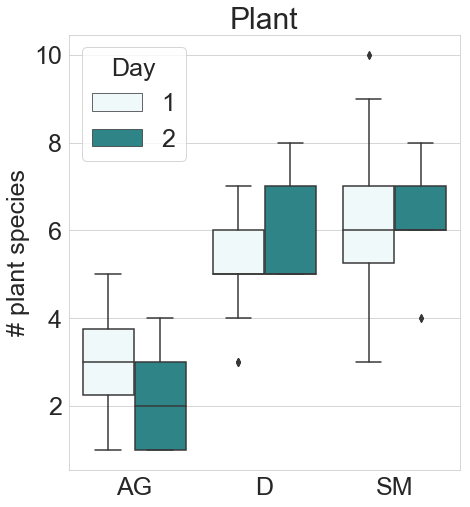

In [8]:
fig, ax = plt.subplots(figsize=(7, 8))
ax = sns.boxplot(x="Treatment", y="Plantspecies", data=longer, order=od, 
                 hue="Day", palette=['#EEFBFC', '#209297'])
ax.set_title("Plant")
ax.set_xlabel("")
ax.set_ylabel("# plant species")

plt.savefig("fig/day1-2_plant.svg", bbox_inches='tight')

plt.show()

# Associations

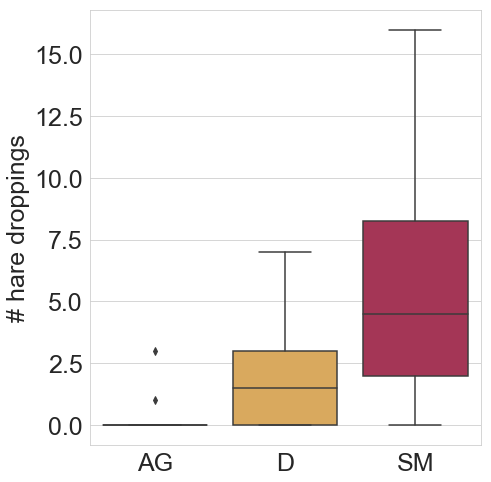

In [9]:
fig, ax = plt.subplots(figsize=(7, 8))
ax = sns.boxplot(x="Treatment", y="Hare", data=df, order=od, palette=['#00C49A', '#EDAE49', '#B6244F'])

ax.set_xlabel("")
ax.set_ylabel("# hare droppings")


plt.savefig("fig/habitat_hare.svg", bbox_inches='tight')

plt.show()

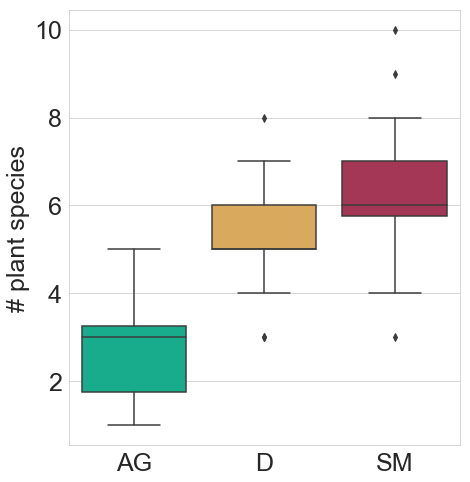

In [10]:
fig, ax = plt.subplots(figsize=(7, 8))
ax = sns.boxplot(x="Treatment", y="Plantspecies", data=df, order=od, palette=['#00C49A', '#EDAE49', '#B6244F'])

ax.set_xlabel("")
ax.set_ylabel("# plant species")


plt.savefig("fig/habitat_plant.svg", bbox_inches='tight')

plt.show()

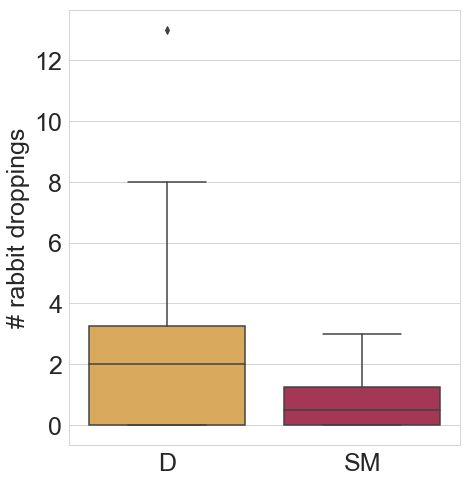

In [11]:
fig, ax = plt.subplots(figsize=(7, 8))
ax = sns.boxplot(x="Treatment", y="Rabbit", data=df.loc[df['Treatment']!='AG',:], order=['D', 'SM'], 
                 palette=['#EDAE49', '#B6244F'])

ax.set_xlabel("")
ax.set_ylabel("# rabbit droppings")


plt.savefig("fig/habitat_rabbit.svg", bbox_inches='tight')

plt.show()

In [12]:
%load_ext watermark
%watermark -n -u -v -iv -w

pandas  0.23.4
seaborn 0.9.0
numpy   1.15.4
last updated: Wed Oct 14 2020 

CPython 3.7.1
IPython 7.2.0
watermark 2.0.2
